In [93]:
!pip3 install tabulate

Defaulting to user installation because normal site-packages is not writeable
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [99]:
from tabulate import tabulate

features = ["CG", "F", "C", "A", "CI"]
fruits = ["B", "R", "S"]
segmentations = ["R", "Y", "D"]

def revertfeature(initials):

    res = ""

    if(initials == "CG"):
        res = "Classic Geometry "

    if(initials == "F"):
        res = "Form "

    if(initials == "C"):
        res = "Color "
    
    if(initials == "A"):
        res = "All "
    
    if(initials == "CI"):
        res = "Cropped Images "
        
    return res

def revertfruit(initial):
    res = ""
    if(initial == "B"):
        res = "Blueberries "
    if(initial == "R"):
        res = "Raspberries "
    if(initial == "S"):
        res = "Strawberries "
    return res


def revertsegmentation(initial):
    res = ""
    if(initial == "R"):
        res = "Raw"
    if(initial == "Y"):
        res = "YOLO"
    if(initial == "D"):
        res = "Detectron"
    return res


data = []
for feature in features:
    for fruit in fruits:
        for segmentation in segmentations:
            data.append(((feature+fruit+segmentation),(revertfeature(feature)+revertfruit(fruit)+revertsegmentation(segmentation))))


table = tabulate(data, ["Acronym", "Full name"], tablefmt="latex")
print(table)

\begin{tabular}{ll}
\hline
 Acronym   & Full name                               \\
\hline
 CGBR      & Classic Geometry Blueberries Raw        \\
 CGBY      & Classic Geometry Blueberries YOLO       \\
 CGBD      & Classic Geometry Blueberries Detectron  \\
 CGRR      & Classic Geometry Raspberries Raw        \\
 CGRY      & Classic Geometry Raspberries YOLO       \\
 CGRD      & Classic Geometry Raspberries Detectron  \\
 CGSR      & Classic Geometry Strawberries Raw       \\
 CGSY      & Classic Geometry Strawberries YOLO      \\
 CGSD      & Classic Geometry Strawberries Detectron \\
 FBR       & Form Blueberries Raw                    \\
 FBY       & Form Blueberries YOLO                   \\
 FBD       & Form Blueberries Detectron              \\
 FRR       & Form Raspberries Raw                    \\
 FRY       & Form Raspberries YOLO                   \\
 FRD       & Form Raspberries Detectron              \\
 FSR       & Form Strawberries Raw                   \\
 FSY       & F

In [40]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Multiply
from keras.layers import ELU, PReLU, LeakyReLU
from keras.models import Model
from keras.utils.vis_utils import plot_model
from tensorflow.keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras import metrics
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121

from tensorflow.keras.layers import GlobalAveragePooling2D

from keras import backend as K

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import math as m
import numpy as np
import seaborn as sns
import os
import json

sns.set_style("darkgrid")
edgecolors=None

config = tf.compat.v1.ConfigProto()

config.gpu_options.allow_growth=True

sess = tf.compat.v1.Session(config=config)


2023-05-08 19:29:20.732462: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-08 19:29:20.733933: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [78]:
'''
Nomenclature:

<DATASET-INITIALS><FRUIT-INITIAL><TEST-INITIAL>.csv|.pkl

DATASET-INITIALS:
CG = Classic Geometry
F = Form
C = Color
A = All
CI = Cropped Images

FRUIT-INITIAL:
B = Blueberry
R = Raspberry
S = Strawberry

TEST-INITIAL:
R = Raw
Y = YOLO
D = Detectron2

---------------------

EXAMPLES

CLASSIC GEOMETRY of RASPBERRIES from RAW test
CGRR.csv

CROPPED IMAGES of BLUEBERRIES from YOLO test
CIBY.pkl

---------------------

Cropped images are the only datasets that are saved in a pickle file


'''

#-----------------Blueberries------------------
###############################################
#Blueberries - RAW
#ClassicGeometry
!wget -O CGBR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryBlueberriesRaw.csv
#Form
!wget -O FBR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsBlueberriesRaw.csv
#Color
!wget -O CBR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsBlueberriesRaw.csv
#All
!wget -O ABR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesBlueberriesRaw.csv
#Images
!wget -O CIBR.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesBlueberriesRaw.pkl
###############################################
#Blueberries - YOLO
#ClassicGeometry
!wget -O CGBY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryYOLOBlue.csv
#Form
!wget -O FBY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsYOLOBlue.csv
#Color
!wget -O CBY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsYOLOBlue.csv
#All
!wget -O ABY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesYOLOBlue.csv
#Images
!wget -O CIBY.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesBlueberriesYOLO.pkl
###############################################
#Blueberries - Detectron2
#ClassicGeometry
!wget -O CGBD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryDetectron2blue.csv
#Form
!wget -O FBD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsDetectron2blue.csv
#Color
!wget -O CBD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsDetectron2blue.csv
#All
!wget -O ABD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesDetectron2blue.csv
#Images
!wget -O CIBD.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesBlueberriesDetectron.pkl
###############################################
#----------------------------------------------

#==============================================
#-----------------Raspberries------------------
###############################################
#Raspberries - RAW
#ClassicGeometry
!wget -O CGRR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryRaspberriesRaw.csv
#Form
!wget -O FRR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsRaspberriesRaw.csv
#Color
!wget -O CRR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsRaspberriesRaw.csv
#All
!wget -O ARR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesRaspberriesRaw.csv
#Images
!wget -O CIRR.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesRaspberriesRaw.pkl
###############################################
#Raspberries - YOLO
#ClassicGeometry
!wget -O CGRY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryYOLORasp.csv
#Form
!wget -O FRY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsYOLORasp.csv
#Color
!wget -O CRY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsYOLORasp.csv
#All
!wget -O ARY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesYOLORasp.csv
#Images
!wget -O CIRY.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesRaspberriesYOLO.pkl
###############################################
#Raspberries - Detectron2
#ClassicGeometry
!wget -O CGRD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryDetectron2rasp.csv
#Form
!wget -O FRD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsDetectron2rasp.csv
#Color
!wget -O CRD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsDetectron2rasp.csv
#All
!wget -O ARD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesDetectron2rasp.csv
#Images
!wget -O CIRD.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesRaspberriesDetectron.pkl
###############################################
#----------------------------------------------

#==============================================
#-----------------Strawberries------------------
###############################################
#Strawberries - RAW
#ClassicGeometry
!wget -O CGSR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryStrawberriesRaw.csv
#Form
!wget -O FSR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsStrawberriesRaw.csv
#Color
!wget -O CSR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsStrawberriesRaw.csv
#All
!wget -O ASR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesStrawberriesRaw.csv
#Images
!wget -O CISR.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesStrawberriesRaw.pkl
###############################################
#Strawberries - YOLO
#ClassicGeometry
!wget -O CGSY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryStrawberriesYOLO.csv
#Form
!wget -O FSY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsStrawberriesYOLO.csv
#Color
!wget -O CSY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsStrawberriesYOLO.csv
#All
!wget -O ASY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesStrawberriesYOLO.csv
#Images
!wget -O CISY.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesStrawberriesYOLO.pkl
###############################################
#Strawberries - Detectron2
#ClassicGeometry
!wget -O CGSD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryDetectron2straw.csv
#Form
!wget -O FSD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsDetectron2straw.csv
#Color
!wget -O CSD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsDetectron2straw.csv
#All
!wget -O ASD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesDetectron2straw.csv
#Images
!wget -O CISD.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesStrawberriesDetectron.pkl
###############################################
#----------------------------------------------

#==============================================

%mkdir figures




--2023-05-08 23:59:23--  https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryBlueberriesRaw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3594 (3.5K) [text/plain]
Saving to: ‘CGBR.csv’

CGBR.csv            100%[===================>]   3.51K  --.-KB/s    in 0s      

2023-05-08 23:59:23 (24.1 MB/s) - ‘CGBR.csv’ saved [3594/3594]

--2023-05-08 23:59:23--  https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsBlueberriesRaw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting re

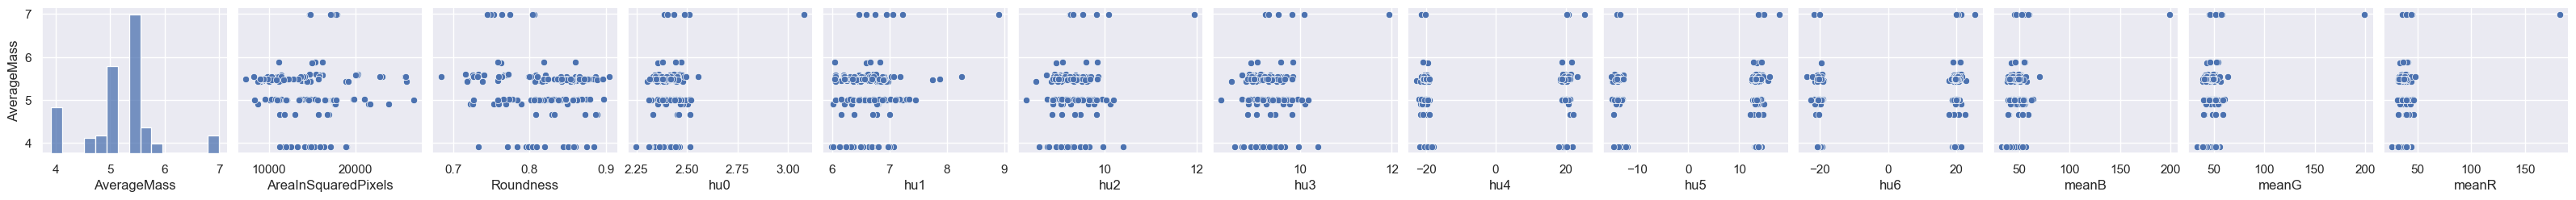

In [141]:
dataset = "ABD"

testdf = pd.read_csv(dataset + ".csv")

testdf = testdf.drop(['ID'], axis=1)

type_of_plot = "pairplot"

pp = sns.pairplot(data=testdf, y_vars=['AverageMass'])

plt.savefig("./figures/" + dataset + type_of_plot, dpi=300)




   ID  AverageMass  AreaInSquaredPixels  Roundness       hu0       hu1  \
0  21      10.2444              17784.0     0.7531  3.077730  8.909260   
1  22      10.2427              17844.0     0.7737  2.489005  7.233462   
2  23      10.2425              17824.5     0.8063  2.388342  6.587881   
3  24      10.1629              17287.5     0.7483  2.400868  6.743719   
4  25      10.1636              17164.0     0.7635  2.509001  7.052720   
5  26       9.7124              14675.5     0.8039  2.434354  6.472751   
6  27       9.7125              14762.0     0.7448  2.487684  6.949047   
7  28       9.8781              15341.5     0.8187  2.470930  6.840833   
8  29       9.8802              15020.5     0.7621  2.352896  6.597453   
9  30       9.9806              16184.0     0.7584  2.443747  6.662325   

         hu2        hu3        hu4        hu5        hu6       meanB  \
0  11.944054  11.944054  25.357529  17.910823  25.327582  198.893786   
1   9.826464   9.826464  20.528179  14.15

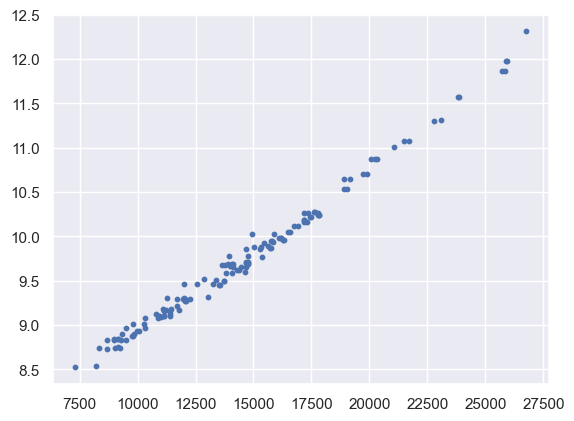

In [151]:
df1 = pd.read_csv("ABR.csv")
print(df1.head(10))
pp = plt.scatter(df1.AreaInSquaredPixels, df1.AverageMass, s = 10)

#pp = sns.scatterplot(data = df1["AverageMass"])
#sns.scatterplot(data=df1, x="AverageMass", y="index")
#plt.scatter(df1.index, df1.AverageMass, s = 10)



['ABR', 'ABY', 'ABD', 'ARR', 'ARY', 'ARD', 'ASR', 'ASY', 'ASD'] 9
B
B
B
B
B
B


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_1204/2072243814.py:126: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 15))


R
R
R
R
R
R
S
S
S
S
S
S


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

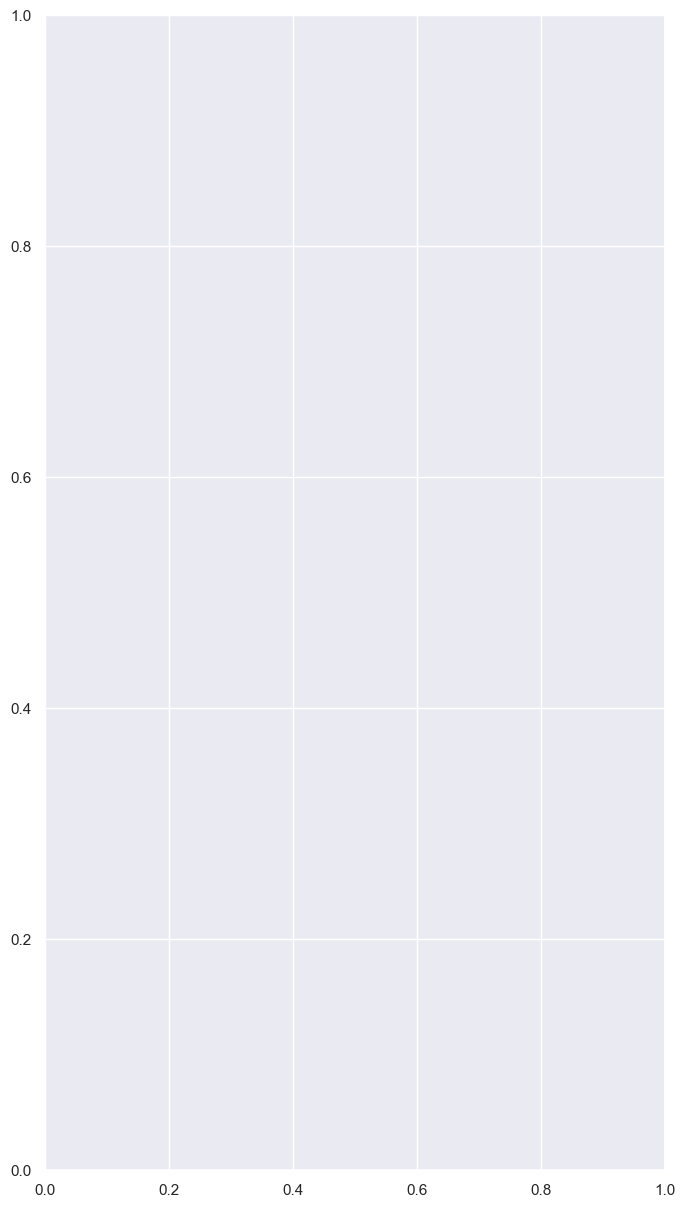

<Figure size 2000x250 with 0 Axes>

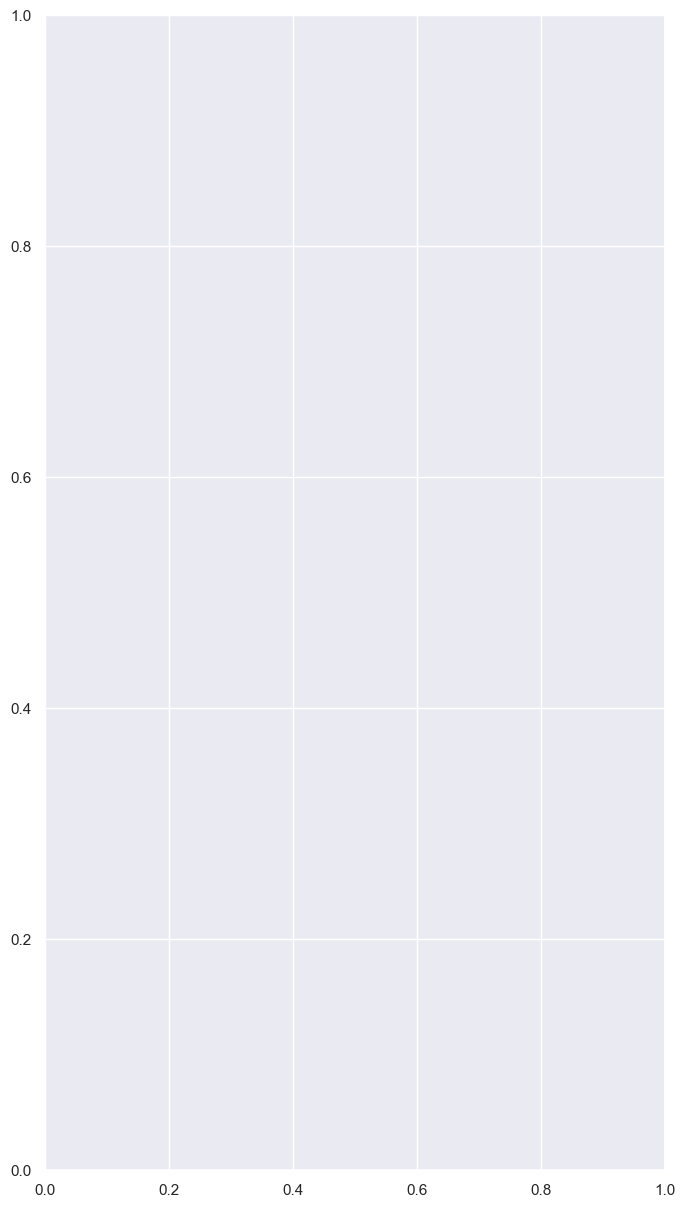

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

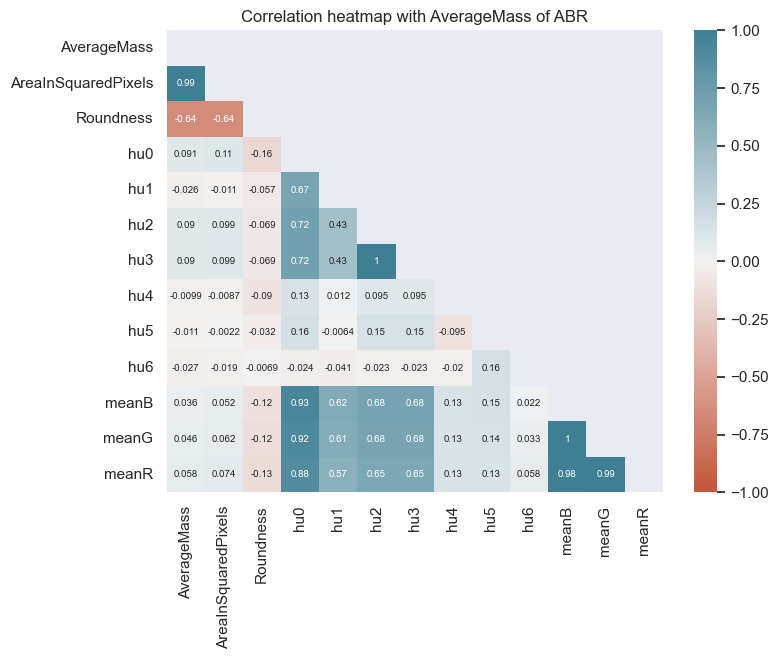

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

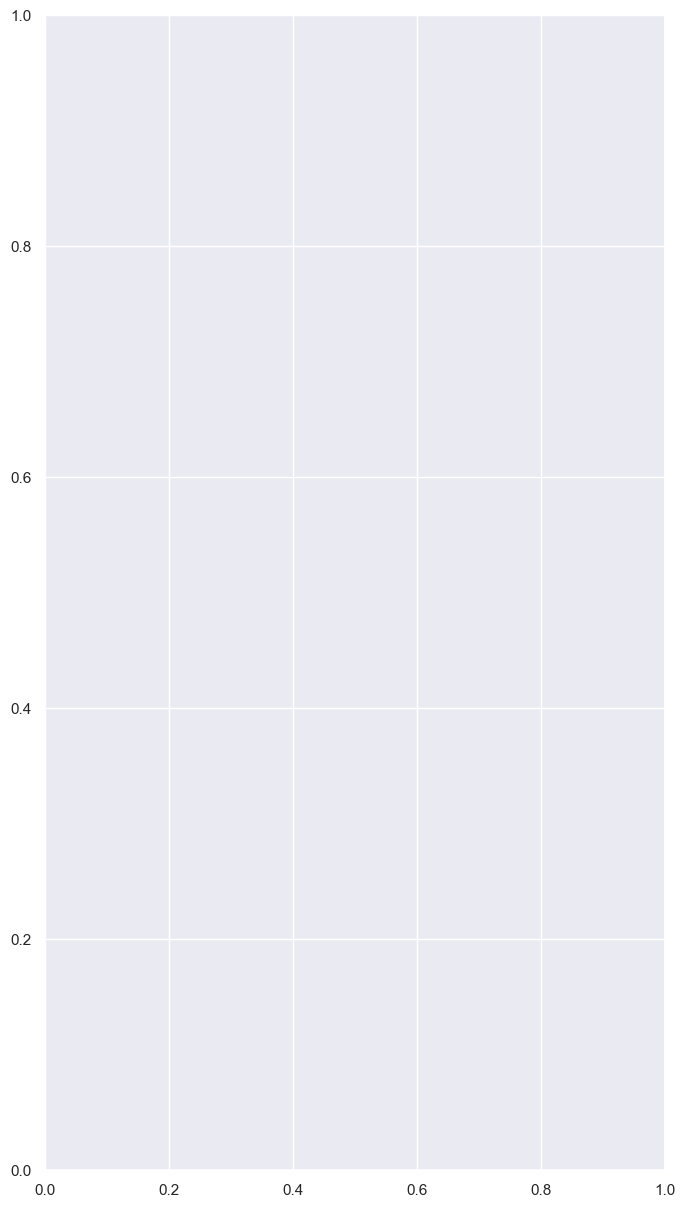

<Figure size 2000x250 with 0 Axes>

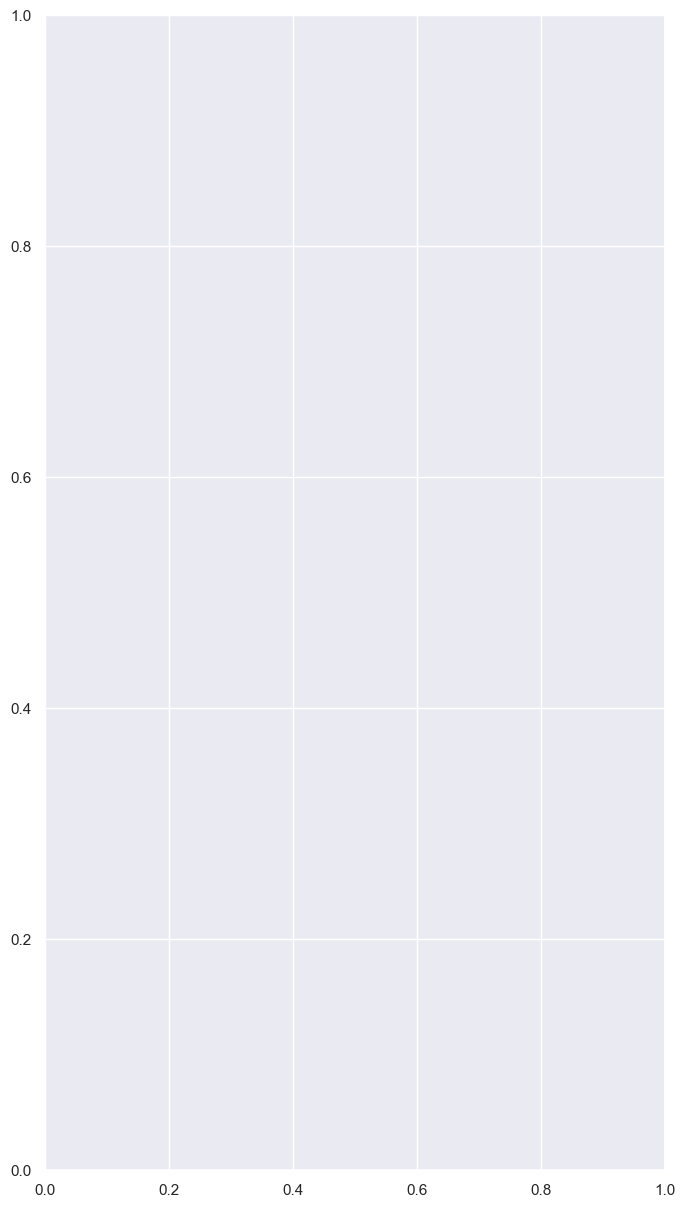

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

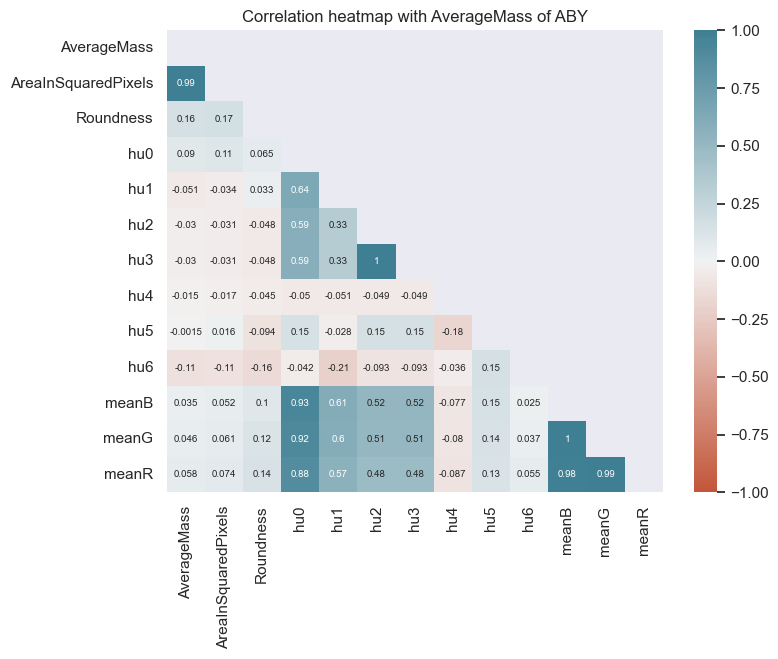

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

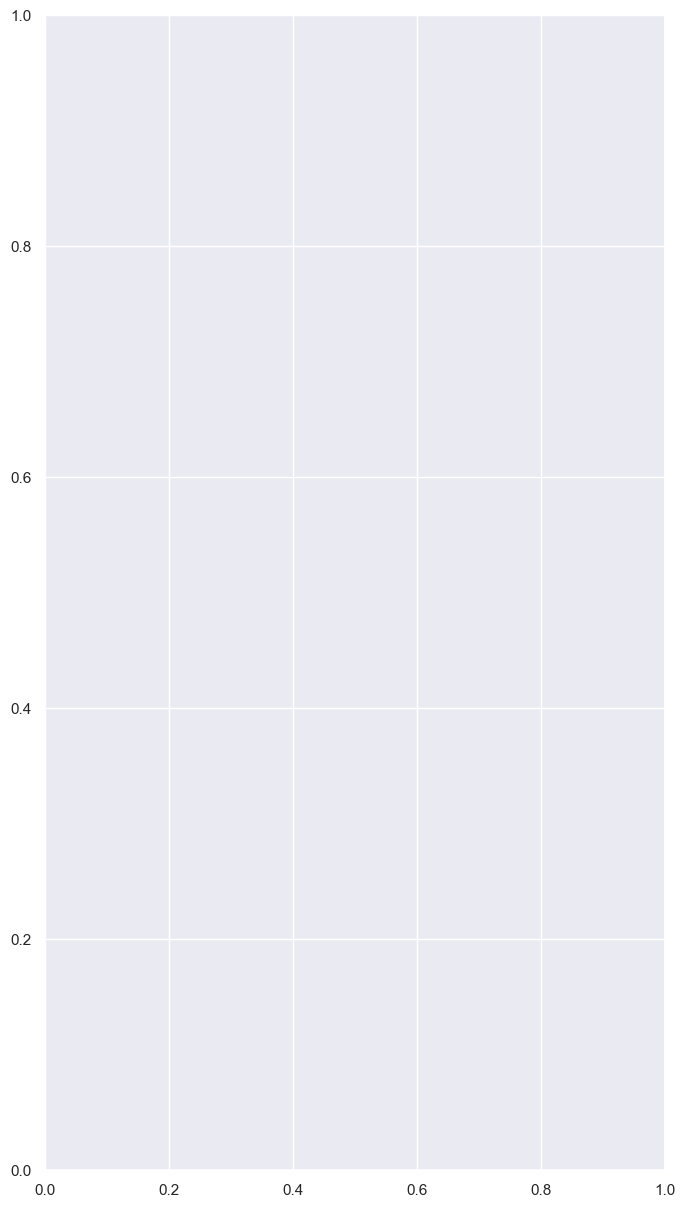

<Figure size 2000x250 with 0 Axes>

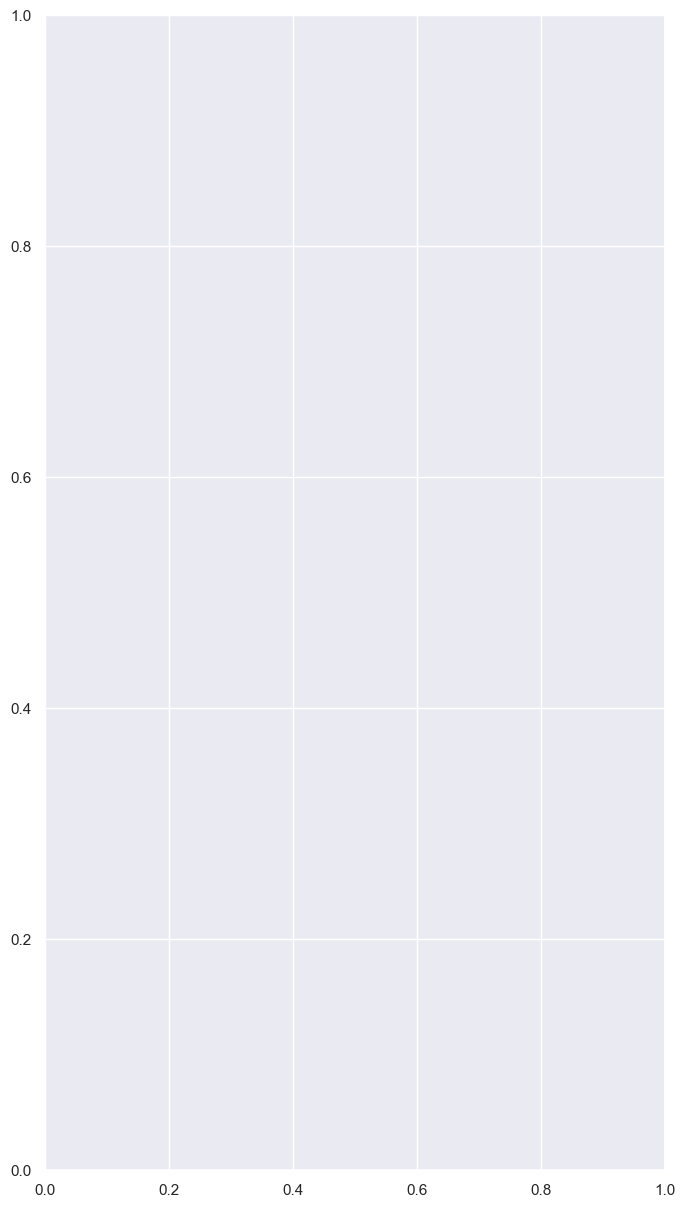

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

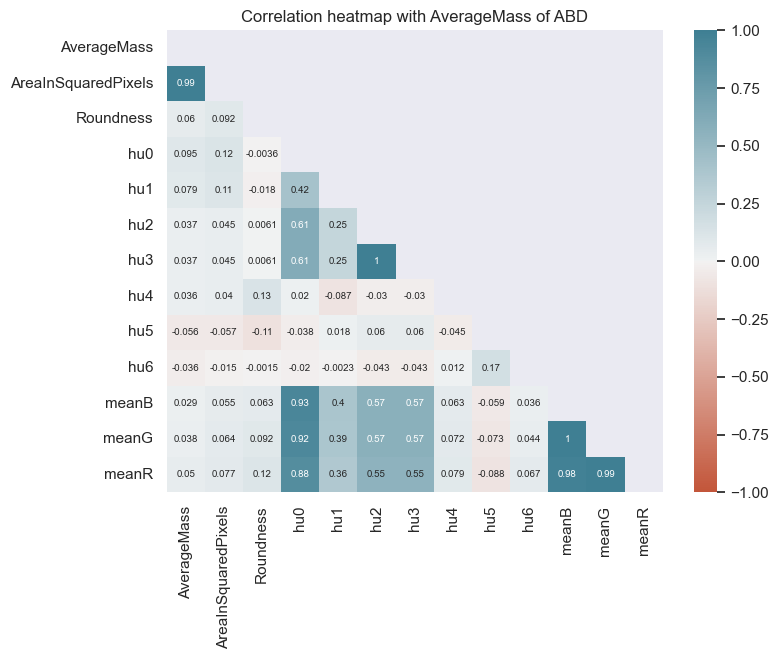

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

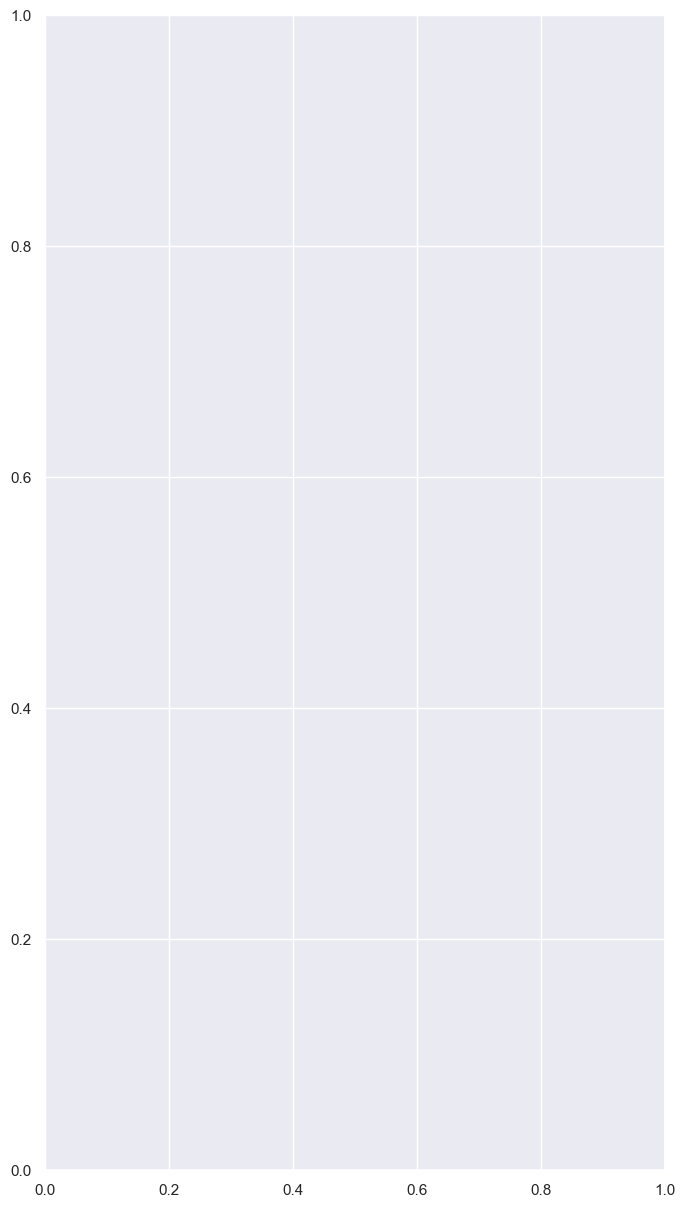

<Figure size 2000x250 with 0 Axes>

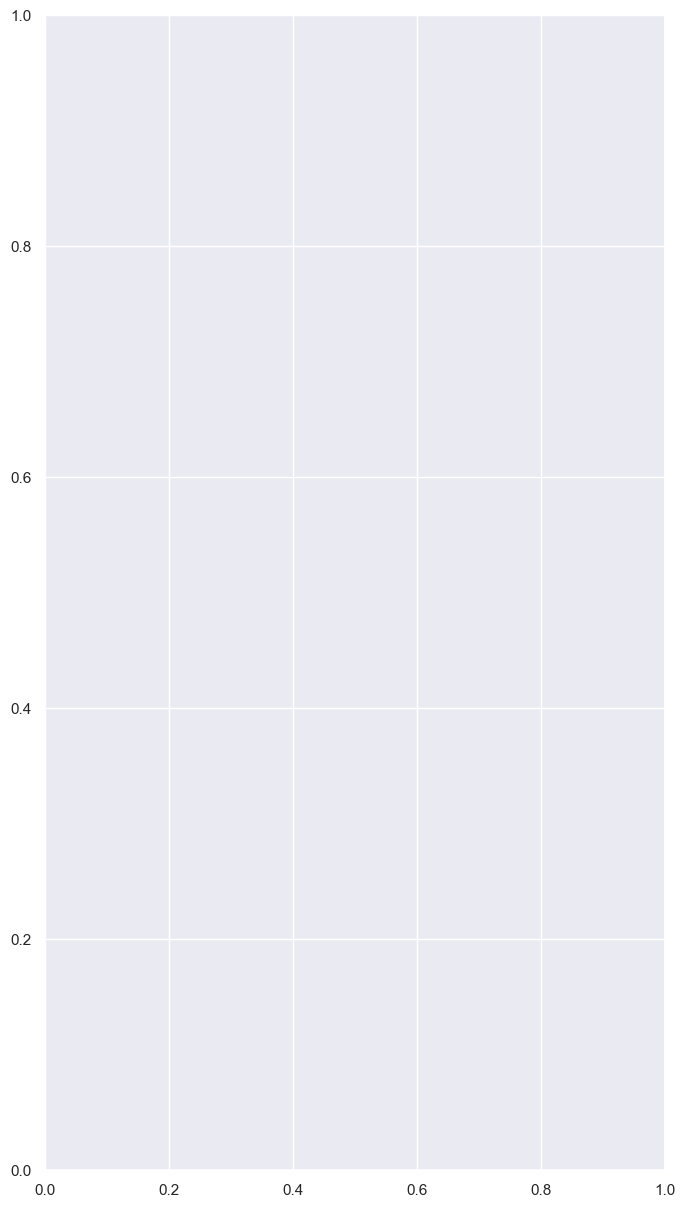

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

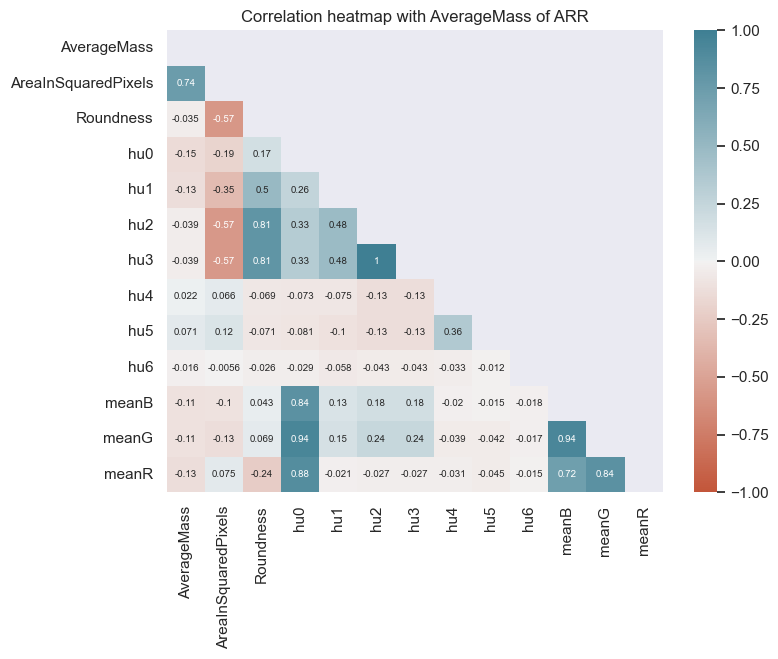

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

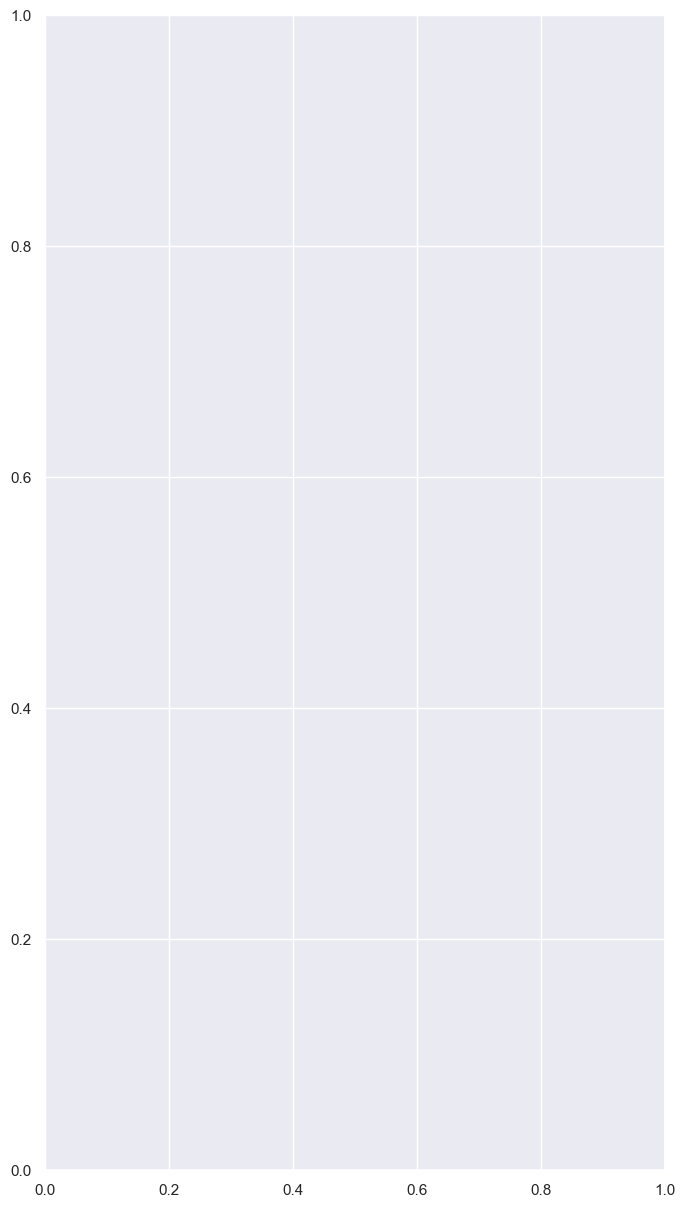

<Figure size 2000x250 with 0 Axes>

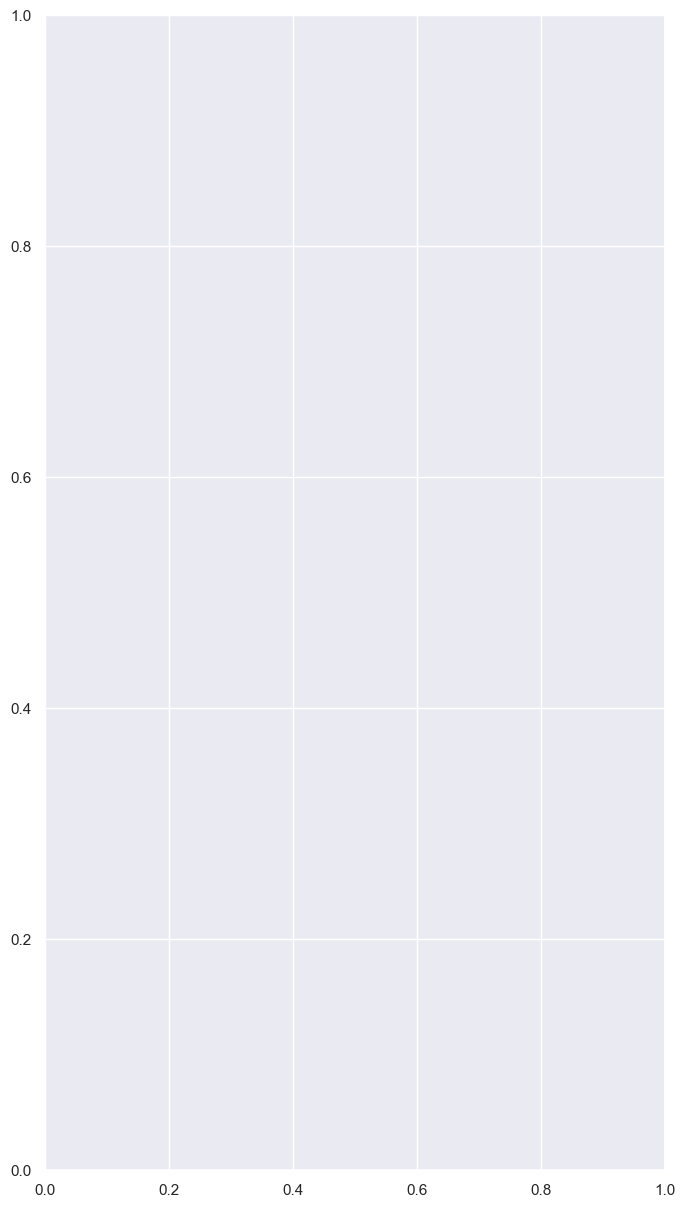

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

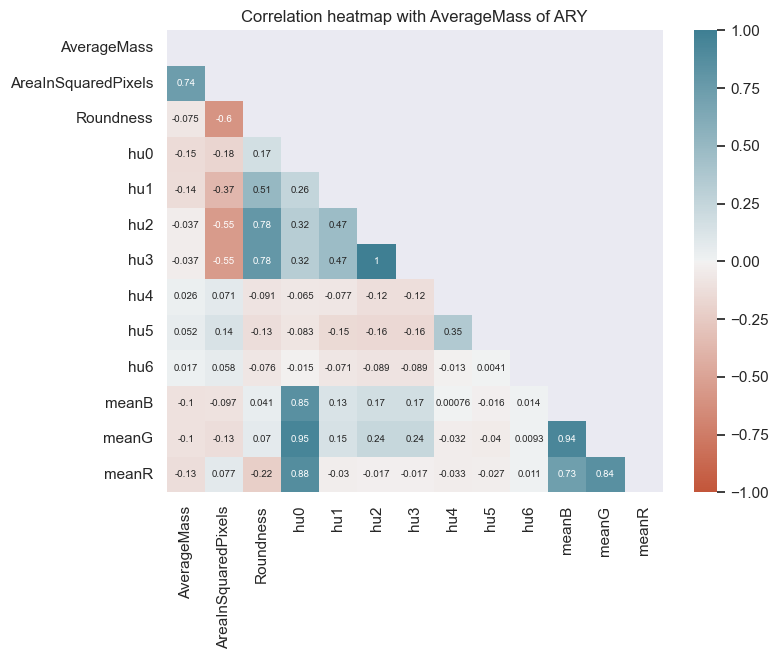

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

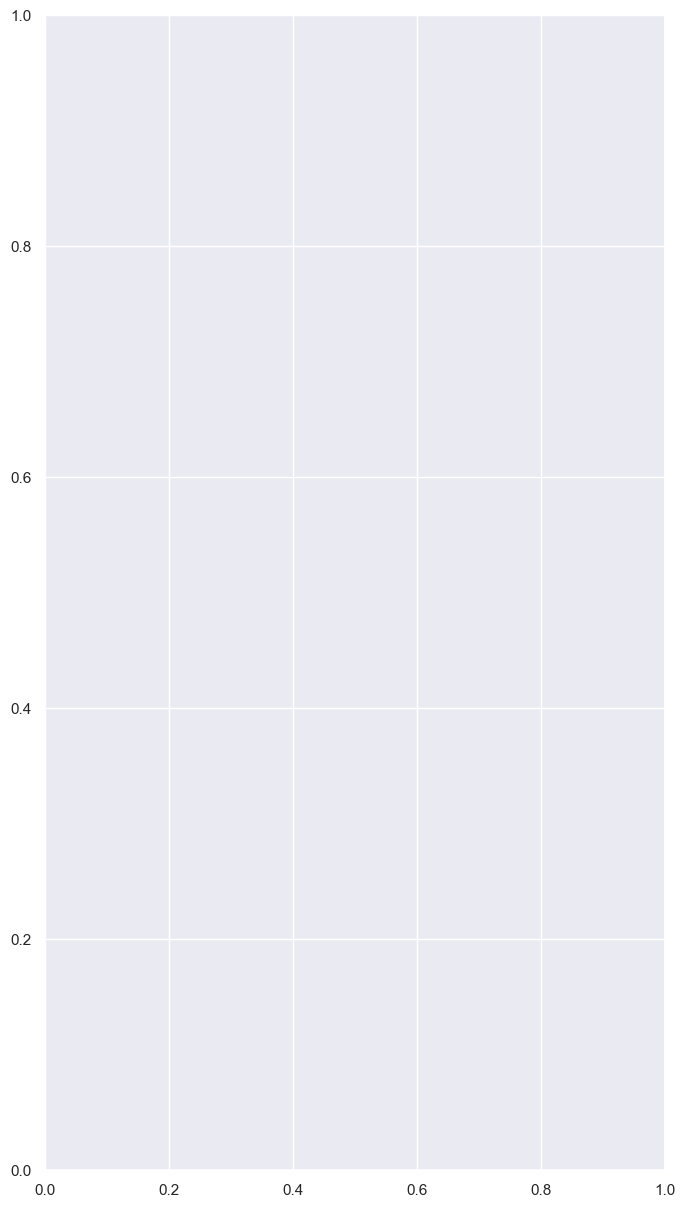

<Figure size 2000x250 with 0 Axes>

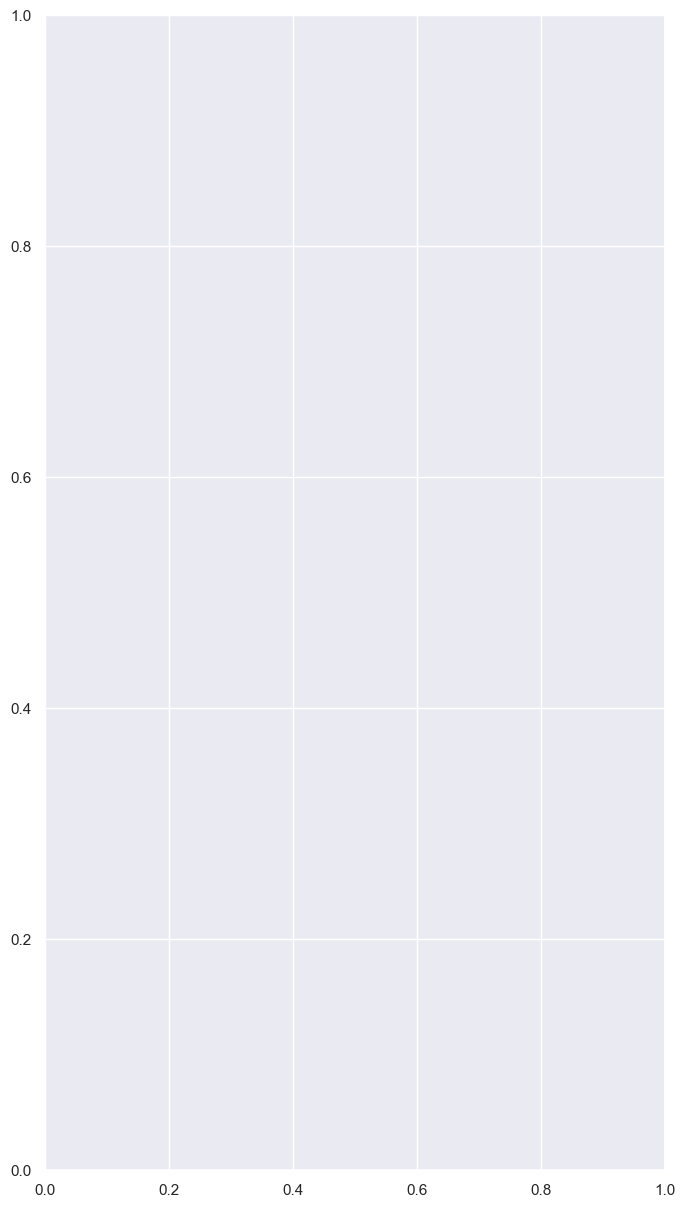

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

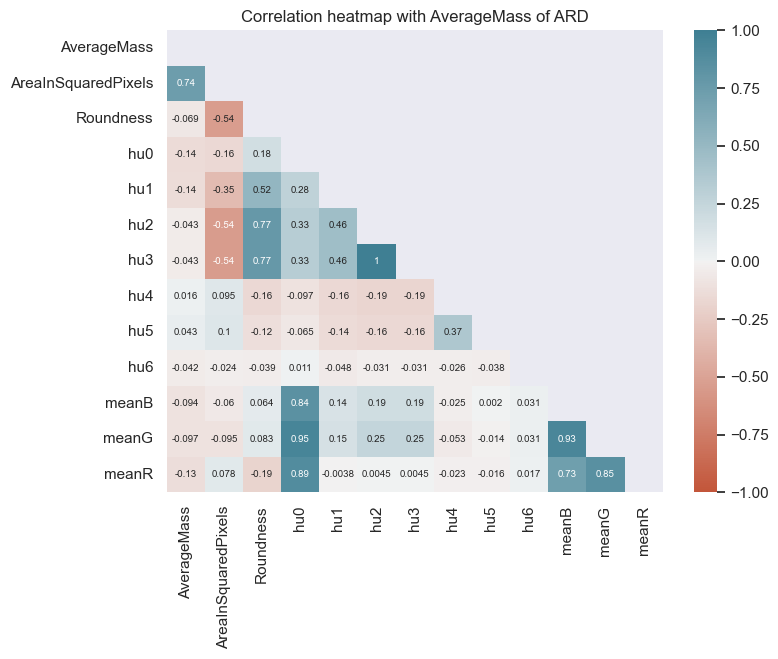

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

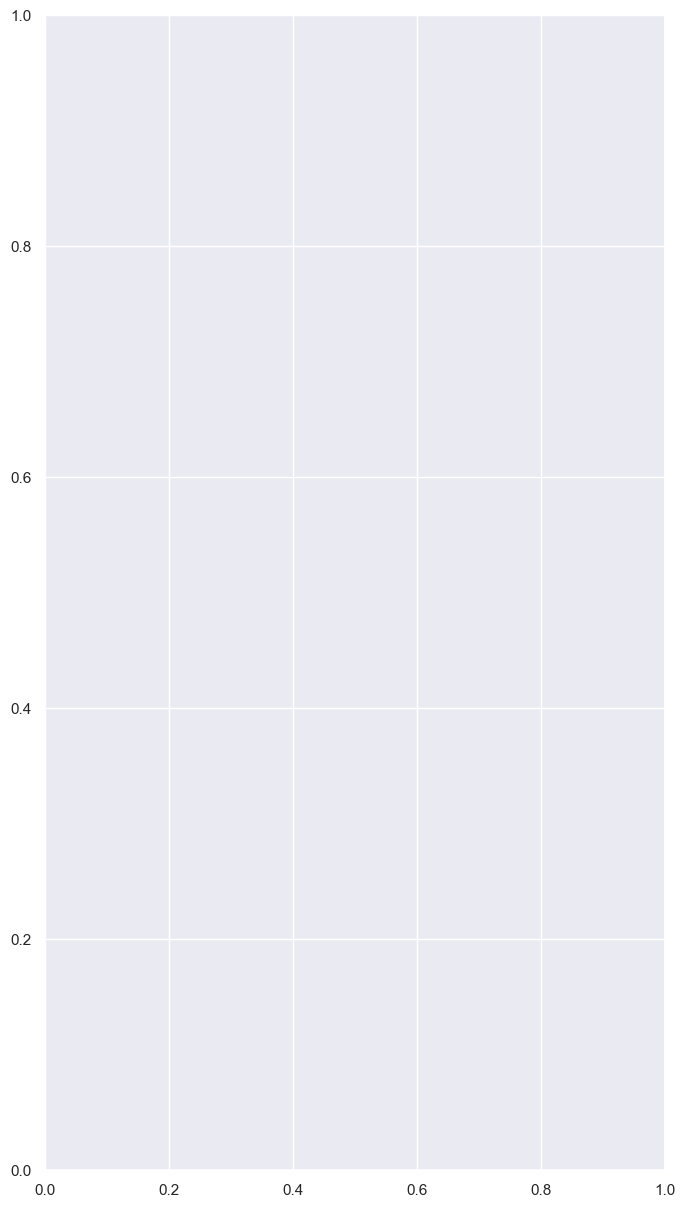

<Figure size 2000x250 with 0 Axes>

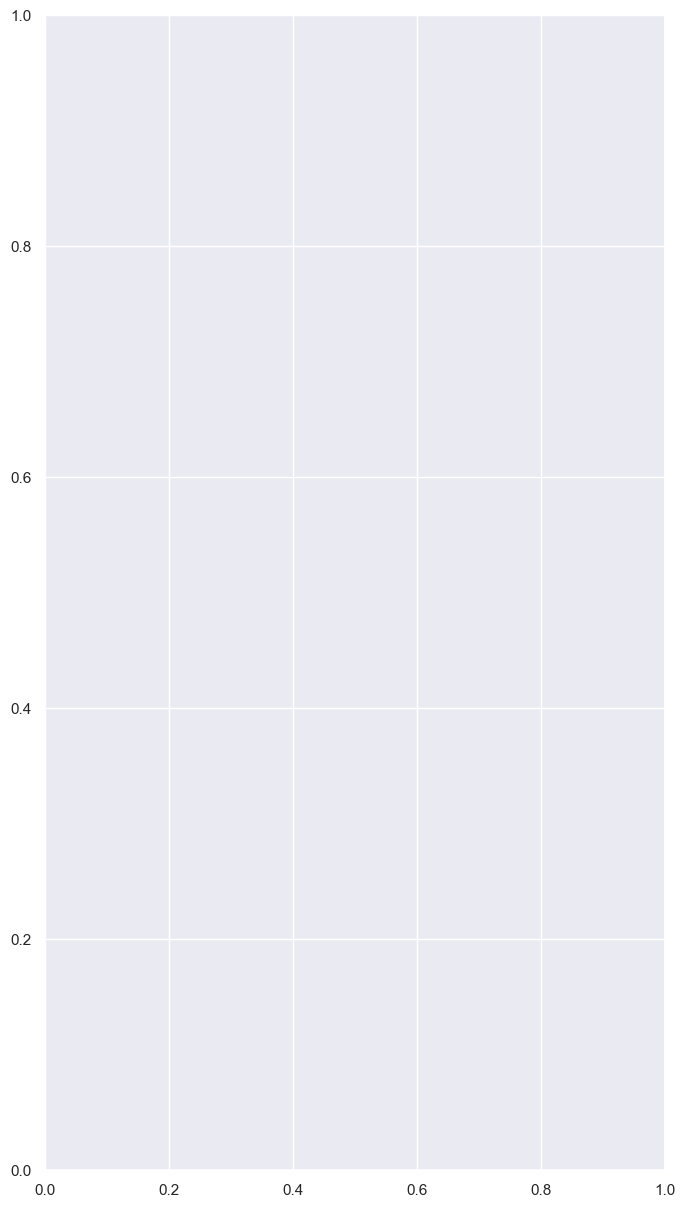

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

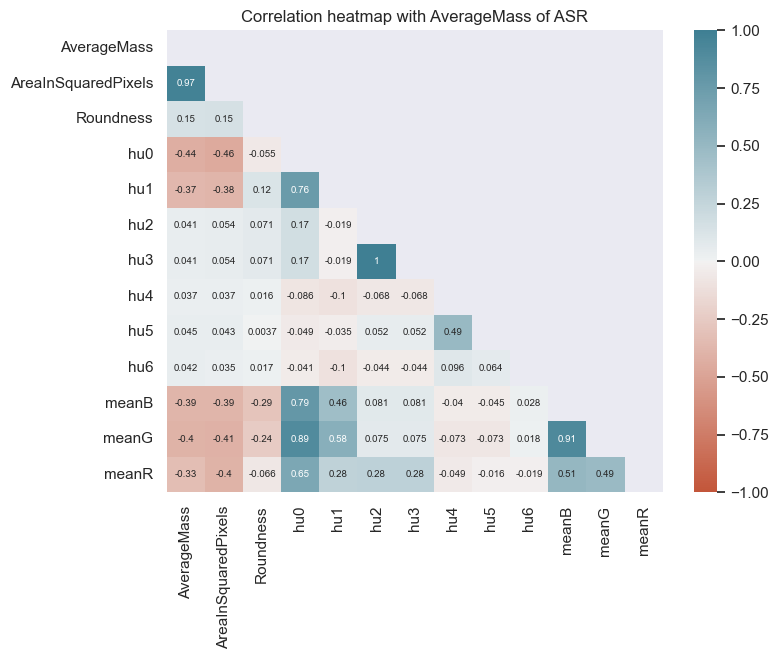

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

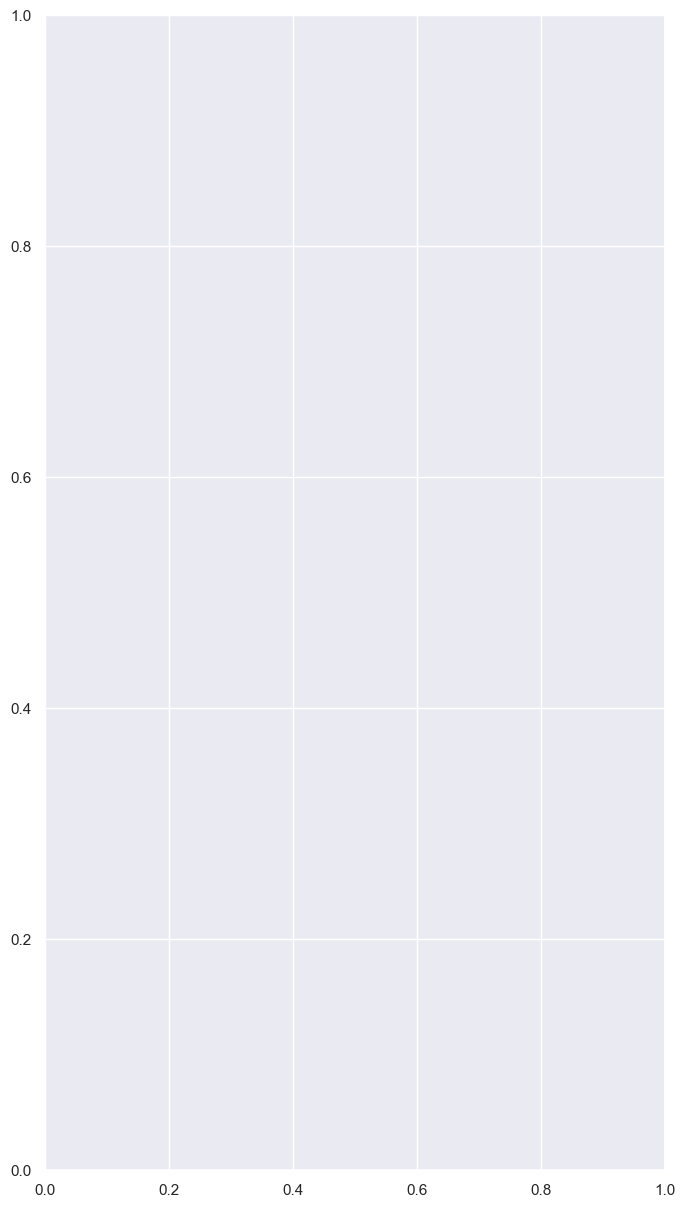

<Figure size 2000x250 with 0 Axes>

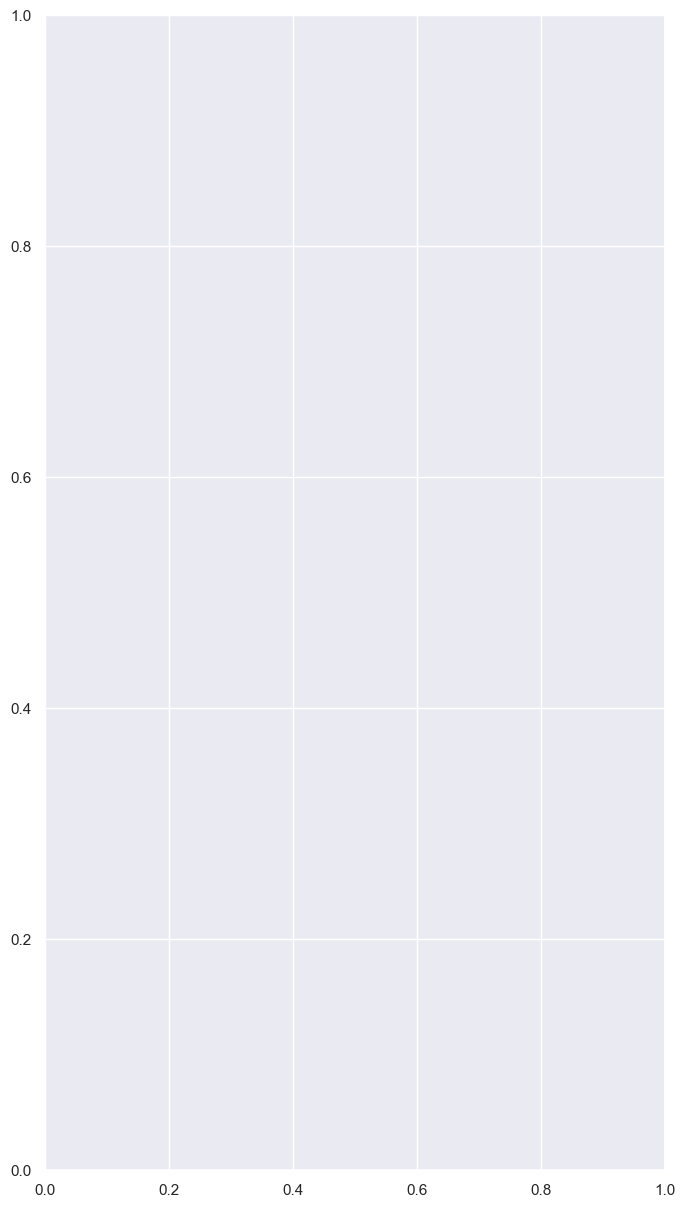

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

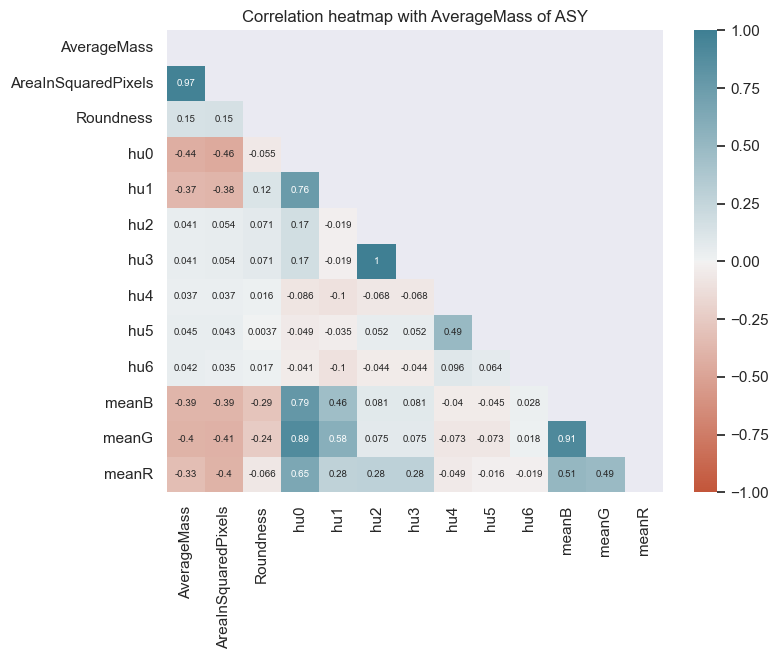

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

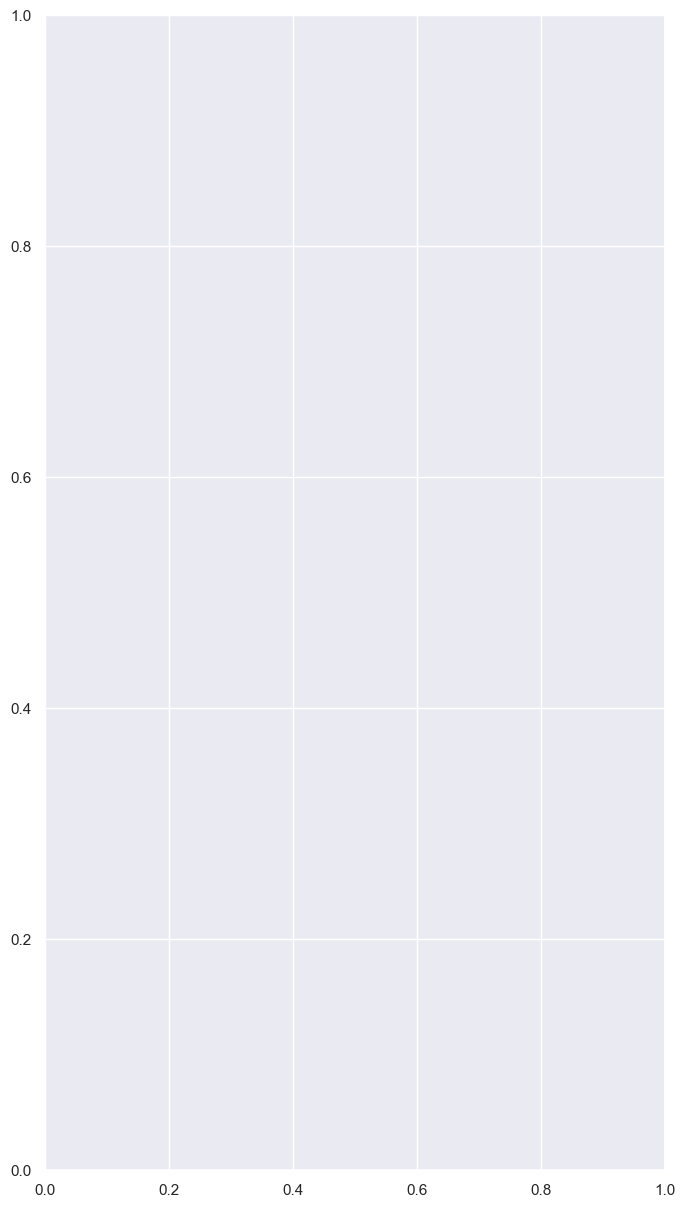

<Figure size 2000x250 with 0 Axes>

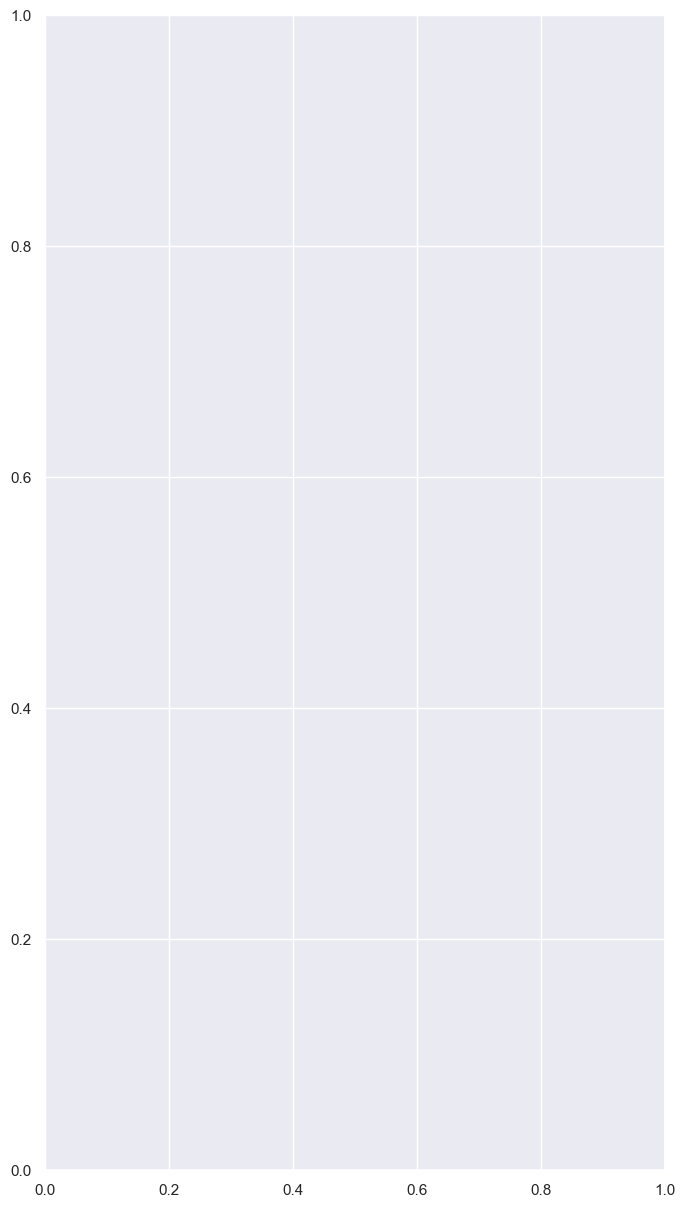

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

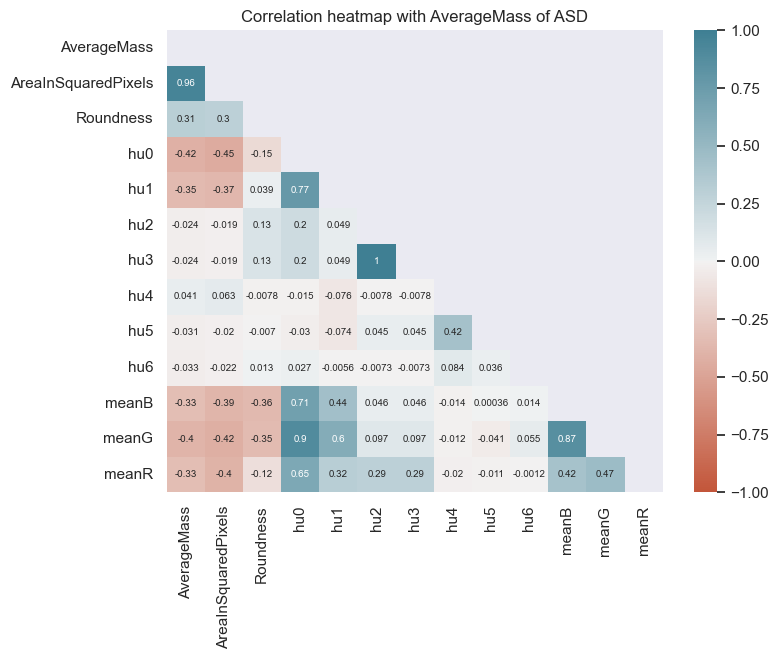

In [152]:

def revertfruit(initial):
    res = ""
    if(initial == "B"):
        res = "Blueberries "
    if(initial == "R"):
        res = "Raspberries "
    if(initial == "S"):
        res = "Strawberries "
    return res


def revertsegmentation(initial):
    res = ""
    if(initial == "R"):
        res = "Raw"
    if(initial == "Y"):
        res = "YOLO"
    if(initial == "D"):
        res = "Detectron"
    return res


features = ["A"]
fruits = ["B", "R", "S"]
segmentations = ["R", "Y", "D"]

datasets = []

for feature in features:
    for fruit in fruits:
        for segmentation in segmentations:
            datasets.append(feature+fruit+segmentation)

print(datasets, len(datasets))


for dataset in datasets:

    foldersuffix = "Correlations"

    #dataset = "ABD"

    directoryName = dataset + '-' + foldersuffix

    path = os.path.join("figures", directoryName)

    if not os.path.exists(path):
        os.mkdir(path)

    testdf = pd.read_csv(dataset + ".csv")


    
    testdf = testdf.drop(['ID'], axis=1)

    df1 = testdf.iloc[:, [0, 3, 4, 5, 6, 7, 8, 9]] 
    df2 = pd.concat([testdf.iloc[:, 0], testdf.iloc[:, [1, 2, 10, 11, 12]]], axis=1) 

    #print("Dataframe 1:")
    #print(df1.head(2))
    #print("Dataframe 2:")
    #print(df2.head(2))

    type_of_plot = "Scatter"

    dataorigin = "AreaAndMass"
    fig, ax = plt.subplots(figsize=(8, 8))
    print(dataset[len(dataset) - 2])
    title = "Area and Mass relationship of " + revertfruit(dataset[len(dataset) - 2]) + "with " + revertsegmentation(dataset[len(dataset) - 1])+ " segmentation"

    savestring = dataset + type_of_plot + dataorigin
    pp = plt.scatter(df2.AreaInSquaredPixels, df2.AverageMass, s = 10)
    plt.title(title)
    plt.xlabel("Area in squared pixels")
    plt.ylabel("Grams (g)")
    
    #pp.fig.suptitle(title, y=1.08)


    #pp.add_legend(title)
    plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
    plt.clf()



    type_of_plot = "Scatter"

    dataorigin = "MassDistribution"
    fig, ax = plt.subplots(figsize=(8, 8))
    print(dataset[len(dataset) - 2])
    title = "Mass distribution of " + revertfruit(dataset[len(dataset) - 2])

    savestring = dataset + type_of_plot + dataorigin
    pp = plt.scatter(df1.index, df1.AverageMass, s = 10)
    plt.title(title)
    plt.xlabel("Fruit ID")
    plt.ylabel("Grams (g)")
    
    #pp.fig.suptitle(title, y=1.08)


    #pp.add_legend(title)
    plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
    plt.clf()



    type_of_plot = "Pairplot"

    dataorigin = "Hu"
    fig, ax = plt.subplots(figsize=(8, 15))
    title = "Correlation with AverageMass of " + dataset + " - Form"

    savestring = dataset + type_of_plot + dataorigin
    pp = sns.pairplot(data=df1, y_vars=['AverageMass'])


    pp.fig.suptitle(title, y=1.08)


    #pp.add_legend(title)
    plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
    plt.clf()

    dataorigin = "Geometry"
    fig, ax = plt.subplots(figsize=(8, 15))     
    savestring = dataset + type_of_plot + dataorigin
    title = "Correlation with AverageMass of " + dataset + " - Classic Geometry and Color"


    pp = sns.pairplot(data=df2, y_vars=['AverageMass'])
    pp.fig.suptitle(title, y=1.08)

    #pp.set_title(title)
    #pp.add_legend(title)
    #ax.set_title(title)

    plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
    plt.clf()

    dataorigin = "All"
    type_of_plot = "CorrelationCoefficient"
    fig, ax = plt.subplots(figsize=(8, 6))
    title = "Correlation with AverageMass of " + dataset


    savestring = dataset + type_of_plot + dataorigin
    pp = testdf.corr()["AverageMass"].sort_values()[:-1].plot.barh()
    pp.set_title(title)
    pp.set_xlabel("Correlation coefficient")


    # save the figure to a file
    plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
    #plt.savefig("./figures/" + savestring, dpi=300)


    plt.clf()


    dataorigin = "All"
    type_of_plot = "CorrelationHeatmap"
    fig, ax = plt.subplots(figsize=(8, 6))
    title = "Correlation heatmap with AverageMass of " + dataset
    #fig.set_title(title)

    ax.set_title(title)


    corrmat = testdf.corr()
    mask= np.zeros_like(corrmat)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corrmat,
                vmax=1, vmin=-1,
                annot=True, annot_kws={'fontsize':7},
                mask=mask,
                cmap=sns.diverging_palette(20,220,as_cmap=True))

    savestring = dataset + type_of_plot + dataorigin



    plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
